<a href="https://colab.research.google.com/github/soumya0422/FitPulse-Health-Anomaly-Detection-from-Fitness-Devices-/blob/main/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

In [4]:
from google.colab import files
df = files.upload()

Saving processed_data.csv to processed_data.csv


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Cleaned_Data.csv')

In [5]:
df

{'processed_data.csv': b'Id,Time,heart_rate,StepTotal,sleep_efficiency,fragmented_sleep,sleep_hours,daily_sleep_date\n2022484408,2016-04-12 07:00:00+00:00,83.2,847.0,0.9467889908256881,0,7.05,2016-04-12\n2022484408,2016-04-12 08:00:00+00:00,68.56200527704486,334.0,0.9467889908256881,0,7.05,2016-04-12\n2022484408,2016-04-12 09:00:00+00:00,66.40469973890339,243.0,0.9467889908256881,0,7.05,2016-04-12\n2022484408,2016-04-12 10:00:00+00:00,106.7160751565762,5243.0,0.9467889908256881,0,7.05,2016-04-12\n2022484408,2016-04-12 11:00:00+00:00,67.7671568627451,323.0,0.9467889908256881,0,7.05,2016-04-12\n2022484408,2016-04-12 12:00:00+00:00,66.23056994818653,184.0,0.9467889908256881,0,7.05,2016-04-12\n2022484408,2016-04-12 13:00:00+00:00,83.6875,658.0,0.9467889908256881,0,7.05,2016-04-12\n2022484408,2016-04-12 14:00:00+00:00,80.57709251101322,2168.0,0.9467889908256881,0,7.05,2016-04-12\n2022484408,2016-04-12 15:00:00+00:00,68.32692307692308,327.0,0.9467889908256881,0,7.05,2016-04-12\n2022484408,20

In [13]:
import pandas as pd
import io

# Assuming 'df' contains the uploaded dictionary from files.upload()
# And that 'processed_data.csv' is the key for the desired CSV content
if isinstance(df, dict) and 'processed_data.csv' in df:
    df = pd.read_csv(io.BytesIO(df['processed_data.csv']))
else:
    # Fallback or error handling if df is not the expected dictionary
    # For instance, if df was meant to be loaded from Google Drive directly
    # You might want to ensure cell 'bn9ijZtiPXpj' is run first
    print("Warning: df is not a dictionary with 'processed_data.csv' or has been overwritten.")
    print("Attempting to proceed, but unexpected behavior may occur.")

df_prophet = df.rename(columns={
    "Time": "ds",
    "heart_rate": "y"
})

df_prophet["ds"] = pd.to_datetime(df_prophet["ds"]).dt.tz_localize(None)

Attempting to proceed, but unexpected behavior may occur.


In [14]:
from prophet import Prophet

model = Prophet()
model.fit(df_prophet)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [15]:
future = model.make_future_dataframe(periods=10, freq="min")
forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


                     ds       yhat  yhat_lower  yhat_upper
742 2016-05-12 16:06:00  78.919915   61.936689   95.626860
743 2016-05-12 16:07:00  78.953373   61.727833   95.061617
744 2016-05-12 16:08:00  78.986997   61.489412   95.883417
745 2016-05-12 16:09:00  79.020780   61.961949   96.181115
746 2016-05-12 16:10:00  79.054714   61.516540   95.796119


In [16]:
future = model.make_future_dataframe(periods=10, freq="min")

In [17]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-04-12 00:00:00,74.233087,51.693567,85.255564,74.233087,74.233087,-6.188715,-6.188715,-6.188715,-6.646168,-6.646168,-6.646168,0.457454,0.457454,0.457454,0.0,0.0,0.0,68.044372
1,2016-04-12 01:00:00,74.235878,49.218626,83.035159,74.235878,74.235878,-8.599079,-8.599079,-8.599079,-9.058237,-9.058237,-9.058237,0.459158,0.459158,0.459158,0.0,0.0,0.0,65.636800
2,2016-04-12 02:00:00,74.238670,45.872757,78.811171,74.238670,74.238670,-11.438705,-11.438705,-11.438705,-11.889631,-11.889631,-11.889631,0.450926,0.450926,0.450926,0.0,0.0,0.0,62.799965
3,2016-04-12 03:00:00,74.241461,44.847725,77.908335,74.241461,74.241461,-12.935762,-12.935762,-12.935762,-13.368544,-13.368544,-13.368544,0.432782,0.432782,0.432782,0.0,0.0,0.0,61.305699
4,2016-04-12 04:00:00,74.244253,45.470383,80.695221,74.244253,74.244253,-11.502926,-11.502926,-11.502926,-11.907797,-11.907797,-11.907797,0.404871,0.404871,0.404871,0.0,0.0,0.0,62.741327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,2016-05-12 16:06:00,73.124912,61.936689,95.626860,73.124912,73.124912,5.795003,5.795003,5.795003,5.984560,5.984560,5.984560,-0.189557,-0.189557,-0.189557,0.0,0.0,0.0,78.919915
743,2016-05-12 16:07:00,73.124938,61.727833,95.061617,73.124938,73.124938,5.828435,5.828435,5.828435,6.018225,6.018225,6.018225,-0.189790,-0.189790,-0.189790,0.0,0.0,0.0,78.953373
744,2016-05-12 16:08:00,73.124965,61.489412,95.883417,73.124965,73.124965,5.862032,5.862032,5.862032,6.052056,6.052056,6.052056,-0.190024,-0.190024,-0.190024,0.0,0.0,0.0,78.986997
745,2016-05-12 16:09:00,73.124991,61.961949,96.181115,73.124991,73.124991,5.895789,5.895789,5.895789,6.086047,6.086047,6.086047,-0.190258,-0.190258,-0.190258,0.0,0.0,0.0,79.020780


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


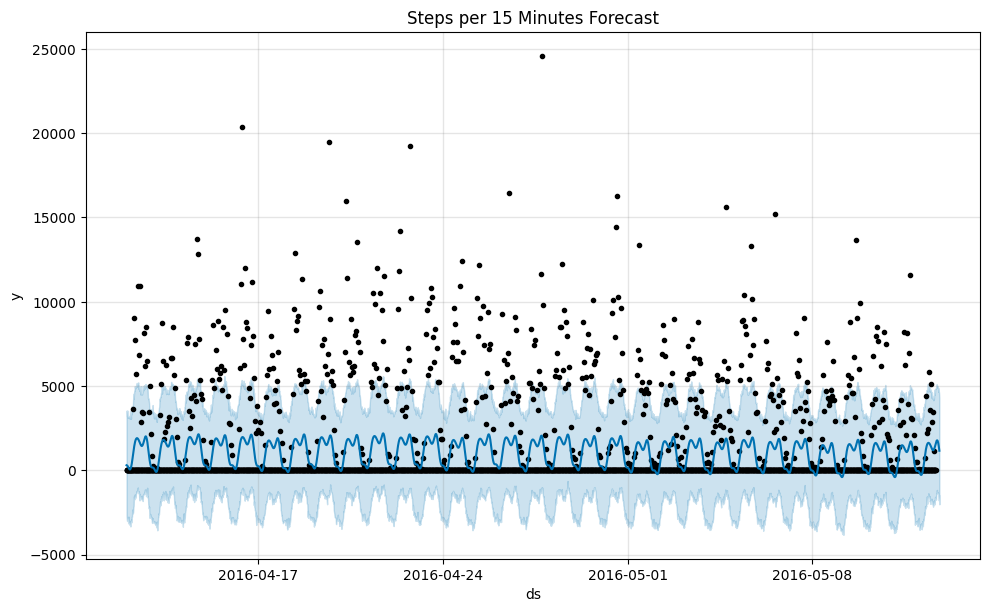

In [20]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data (15-minute aggregation)
df_steps = df[["Time", "StepTotal"]].copy()
df_steps["Time"] = pd.to_datetime(df_steps["Time"]).dt.tz_localize(None)
df_steps = df_steps.rename(columns={"Time": "ds", "StepTotal": "steps"})

df_15min_step = (
    df_steps
    .set_index("ds")
    .resample("15min")
    .sum()
    .reset_index()
)

# Prophet format
df_15min_step["ds"] = pd.to_datetime(df_15min_step["ds"]).dt.tz_localize(None)
df_15min_step.rename(columns={"steps": "y"}, inplace=True)

# Train model
model_steps = Prophet()
model_steps.fit(df_15min_step)

# Predict future (14 \u00d7 15min = 3.5 hours)
future_steps = model_steps.make_future_dataframe(periods=14, freq="15min")
forecast_steps = model_steps.predict(future_steps)

# Plot
model_steps.plot(forecast_steps)
plt.title("Steps per 15 Minutes Forecast")
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


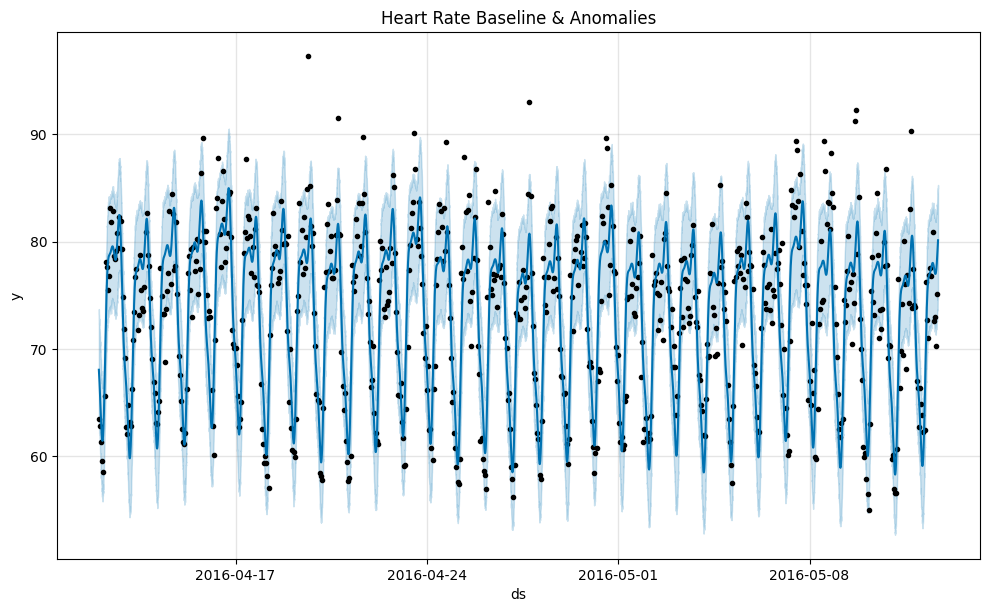

In [22]:
# Resample heart rate
df_hr = (
    df[["Time", "heart_rate"]]
    .copy()
)
df_hr["Time"] = pd.to_datetime(df_hr["Time"]).dt.tz_localize(None) # Remove timezone here after initial conversion
df_hr = df_hr.set_index("Time").resample("5min").mean().reset_index()

# Prophet format
df_hr = df_hr.rename(columns={"Time": "ds", "heart_rate": "y"})
df_hr["ds"] = pd.to_datetime(df_hr["ds"]).dt.tz_localize(None) # Ensure timezone is removed again after resampling if it somehow reappears or for consistency

# Train
model_hr = Prophet(daily_seasonality=True)
model_hr.fit(df_hr)

# Predict
future_hr = model_hr.make_future_dataframe(periods=10, freq="5min")
forecast_hr = model_hr.predict(future_hr)

# Plot
model_hr.plot(forecast_hr)
plt.title("Heart Rate Baseline & Anomalies")
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


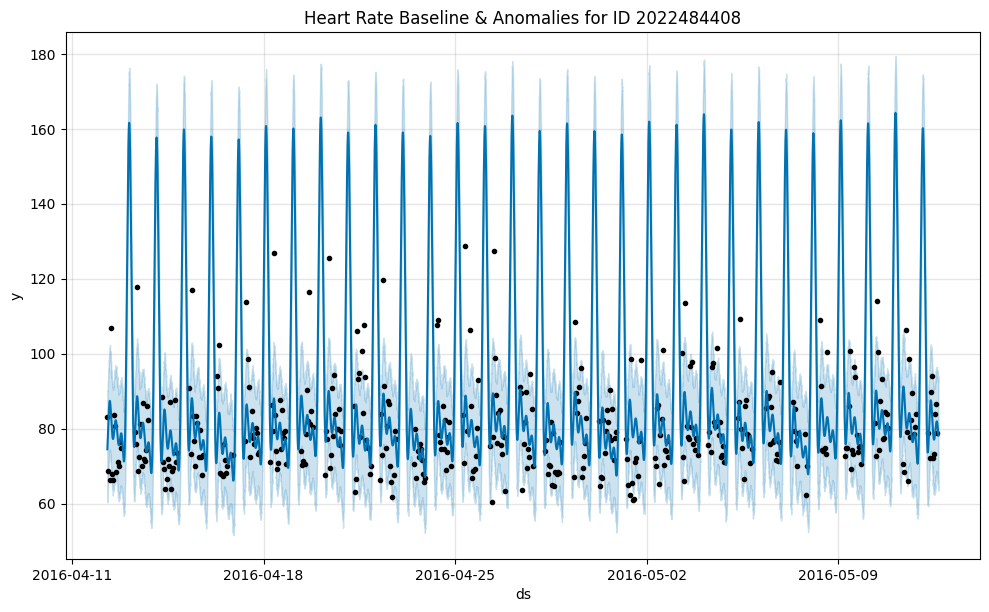

In [24]:
participant_id = 2022484408 # Example: assign a participant ID

# Filter the dataframe for that user
df_user = df[df["Id"] == participant_id][["Time", "heart_rate"]].copy()

# Convert to datetime and resample
df_user["Time"] = pd.to_datetime(df_user["Time"]).dt.tz_localize(None)
df_user = df_user.set_index("Time").resample("5min").mean().reset_index()

# Prepare for Prophet
df_user = df_user.rename(columns={"Time": "ds", "heart_rate": "y"})
df_user["ds"] = pd.to_datetime(df_user["ds"]).dt.tz_localize(None)

# Train Prophet
model_user = Prophet(daily_seasonality=True)
model_user.fit(df_user)

# Predict
future_user = model_user.make_future_dataframe(periods=10, freq="5min")
forecast_user = model_user.predict(future_user)

# Plot
model_user.plot(forecast_user)
plt.title(f"Heart Rate Baseline & Anomalies for ID {participant_id}")
plt.show()

In [26]:
# Aggregate minute-level sleep to daily total
df_sleep_daily = (
    df[["Time", "sleep_hours"]]
    .copy()
)
df_sleep_daily["Time"] = pd.to_datetime(df_sleep_daily["Time"]).dt.tz_localize(None)
df_sleep_daily = df_sleep_daily.set_index("Time").resample("D").sum().reset_index()

# Prepare for Prophet
df_sleep_daily = df_sleep_daily.rename(columns={"Time": "ds", "sleep_hours": "y"})


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.


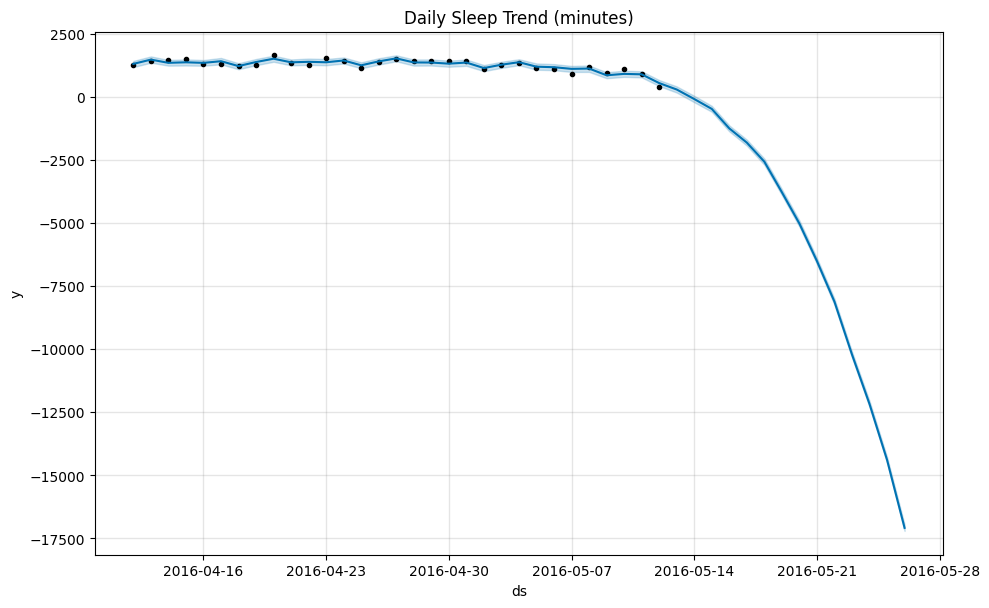

In [27]:
from prophet import Prophet

model_sleep = Prophet(weekly_seasonality=True, yearly_seasonality=True)
model_sleep.fit(df_sleep_daily)

future_sleep = model_sleep.make_future_dataframe(periods=14, freq="D")  # next 14 days
forecast_sleep = model_sleep.predict(future_sleep)

model_sleep.plot(forecast_sleep)
plt.title("Daily Sleep Trend (minutes)")
plt.show()


In [28]:
import pandas as pd

# Merge actual heart rate data with the forecast
anomaly_detection_df = pd.merge(df_hr, forecast_hr[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds', how='inner')

# Identify anomalies: actual value outside the forecasted upper or lower bound
anomalies = anomaly_detection_df[
    (anomaly_detection_df['y'] < anomaly_detection_df['yhat_lower']) |
    (anomaly_detection_df['y'] > anomaly_detection_df['yhat_upper'])
]

print("Potential Heart Rate Anomalies (actual value outside forecast range):")
display(anomalies.head())


Potential Heart Rate Anomalies (actual value outside forecast range):


,ds,y,yhat,yhat_lower,yhat_upper
72,2016-04-12 06:00:00,78.095212,71.712358,66.733433,77.558670
408,2016-04-13 10:00:00,71.768208,77.511394,72.106503,82.651147
648,2016-04-14 06:00:00,77.495020,71.239961,66.322713,76.794885
684,2016-04-14 09:00:00,73.269966,78.512764,73.483846,83.936730
696,2016-04-14 10:00:00,68.720600,78.810268,73.486281,84.224755


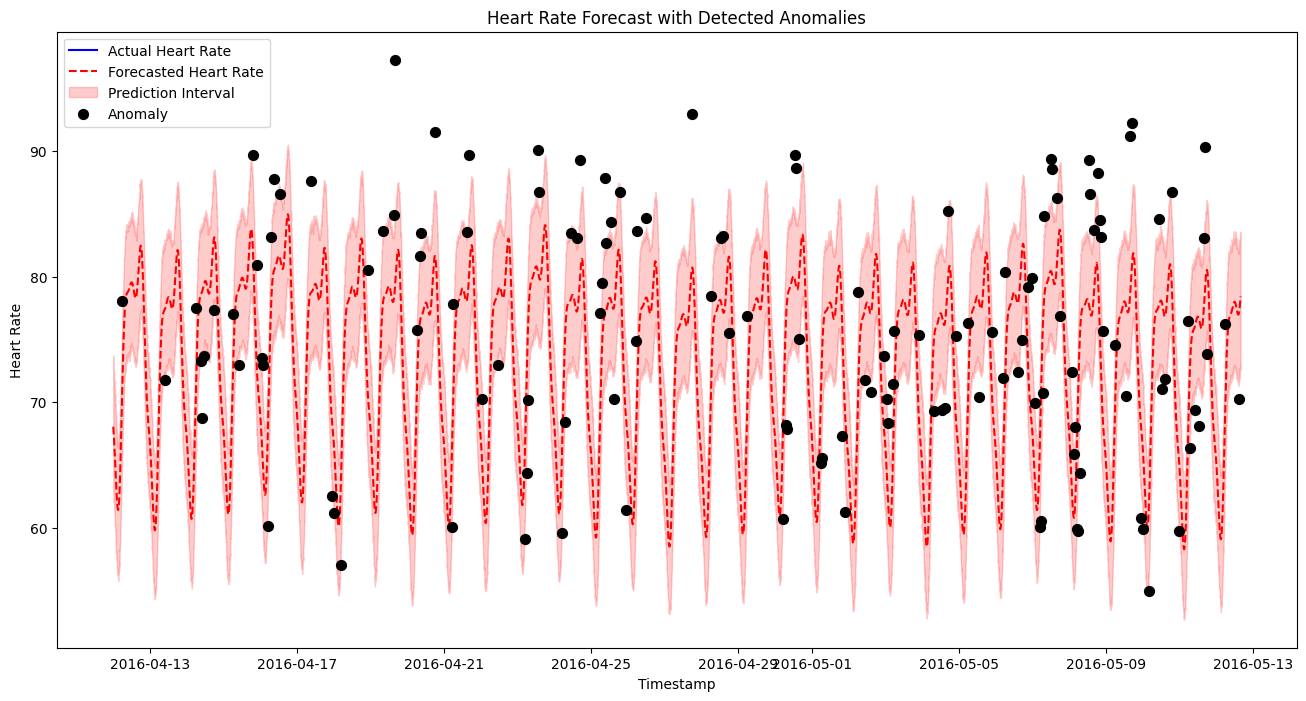

In [29]:

import matplotlib.pyplot as plt

# Plot the forecast with anomalies highlighted
plt.figure(figsize=(16, 8))
plt.plot(anomaly_detection_df['ds'], anomaly_detection_df['y'], label='Actual Heart Rate', color='blue')
plt.plot(anomaly_detection_df['ds'], anomaly_detection_df['yhat'], label='Forecasted Heart Rate', color='red', linestyle='--')
plt.fill_between(anomaly_detection_df['ds'], anomaly_detection_df['yhat_lower'], anomaly_detection_df['yhat_upper'], color='red', alpha=0.2, label='Prediction Interval')

# Highlight anomalies
plt.scatter(anomalies['ds'], anomalies['y'], color='black', marker='o', s=50, zorder=5, label='Anomaly')

plt.title('Heart Rate Forecast with Detected Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Heart Rate')
plt.legend()
plt.show()



In [30]:
df.columns

Index(['Id', 'Time', 'heart_rate', 'StepTotal', 'sleep_efficiency',
       'fragmented_sleep', 'sleep_hours', 'daily_sleep_date'],
      dtype='object')

In [31]:
import pandas as pd

# Using 'df' as your DataFrame
df["Time"] = pd.to_datetime(df["Time"])

# Create day window
df["day"] = df["Time"].dt.date

# Display the head of the modified DataFrame to show the new columns
display(df[['Time', 'day']].head())

,Time,day
0,2016-04-12 07:00:00+00:00,2016-04-12
1,2016-04-12 08:00:00+00:00,2016-04-12
2,2016-04-12 09:00:00+00:00,2016-04-12
3,2016-04-12 10:00:00+00:00,2016-04-12
4,2016-04-12 11:00:00+00:00,2016-04-12


In [33]:
from tsfresh.utilities.dataframe_functions import roll_time_series
import pandas as pd

# Create day window (moved from YWgw0JhqxT4a)
df["Time"] = pd.to_datetime(df["Time"])
df["day"] = df["Time"].dt.date

# Create the missing columns
df["Steps_per_minute"] = df["StepTotal"] / 60
df["Sleep_per_minute"] = df["sleep_hours"] / 60

value_columns = ["heart_rate", "Steps_per_minute", "Sleep_per_minute"]

tsfresh_input = df.melt(
    id_vars=["Id", "Time", "day"],
    value_vars=value_columns,
    var_name="kind",
    value_name="value"
)

tsfresh_input = tsfresh_input.rename(columns={
    "day": "id",
    "Time": "time"
})

tsfresh_input = tsfresh_input[["id", "time", "kind", "value"]]

In [36]:
import numpy as np
from tsfresh import extract_features
from tsfresh.feature_extraction import MinimalFCParameters
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd # Import pandas, as it's used here but not explicitly imported in the cell
# from tsfresh.utilities.dataframe_functions import impute # Removed as we will use pandas.fillna

# Select only 5 users
selected_users = tsfresh_input["id"].unique()[:5]
tsfresh_input_5 = tsfresh_input[tsfresh_input["id"].isin(selected_users)].copy()

# Optional: downsample to 5-minute intervals to reduce number of rows
tsfresh_input_5['time'] = pd.to_datetime(tsfresh_input_5['time'])
tsfresh_input_5 = tsfresh_input_5.set_index('time').groupby(['id', 'kind']).resample('5T')['value'].mean().reset_index()

# IMPUTATION STEP: Fill NaN values in the 'value' column using pandas fillna
tsfresh_input_5['value'].fillna(0, inplace=True)

# Extract TSFresh features (minimal set for speed)
tsfresh_features = extract_features(
    tsfresh_input_5,
    column_id="id",
    column_sort="time",
    column_kind="kind",
    column_value="value",
    default_fc_parameters=MinimalFCParameters(),  # minimal features
    n_jobs=0  # or -1 if you want parallel processing
)

# Clean extracted features
tsfresh_features.replace([np.inf, -np.inf], np.nan, inplace=True)
tsfresh_features.dropna(axis=1, inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(tsfresh_features)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
tsfresh_features["cluster"] = kmeans.fit_predict(X_scaled)

# Final result
tsfresh_features

/tmp/ipython-input-2628506135.py:15: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  tsfresh_input_5 = tsfresh_input_5.set_index('time').groupby(['id', 'kind']).resample('5T')['value'].mean().reset_index()
/tmp/ipython-input-2628506135.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tsfresh_input_5['value'].fillna(0, inplace=True)
Feature Extraction: 100%|██████████| 15/15 [00:00<00:00, 81.66it/s]


,Sleep_per_minute__sum_values,Sleep_per_minute__median,Sleep_per_minute__mean,Sleep_per_minute__length,Sleep_per_minute__standard_deviation,Sleep_per_minute__variance,Sleep_per_minute__root_mean_square,Sleep_per_minute__maximum,Sleep_per_minute__absolute_maximum,Sleep_per_minute__minimum,...,heart_rate__median,heart_rate__mean,heart_rate__length,heart_rate__standard_deviation,heart_rate__variance,heart_rate__root_mean_square,heart_rate__maximum,heart_rate__absolute_maximum,heart_rate__minimum,cluster
2016-04-12,2.570308,0.0,0.009279,277.0,0.030232,0.000914,0.031624,0.121759,0.121759,0.0,...,0.0,6.434977,277.0,21.022986,441.965959,21.985788,83.121724,83.121724,0.0,0
2016-04-13,2.788350,0.0,0.010066,277.0,0.032796,0.001076,0.034306,0.136759,0.136759,0.0,...,0.0,6.274548,277.0,20.447270,418.090853,21.388334,82.612314,82.612314,0.0,2
2016-04-14,2.681031,0.0,0.009679,277.0,0.031531,0.000994,0.032983,0.124815,0.124815,0.0,...,0.0,6.341789,277.0,20.676847,427.532018,21.627536,84.398963,84.398963,0.0,2
2016-04-15,2.524508,0.0,0.009114,277.0,0.029624,0.000878,0.030995,0.112857,0.112857,0.0,...,0.0,6.508838,277.0,21.256344,451.832179,22.230545,89.681933,89.681933,0.0,0
2016-04-16,2.476897,0.0,0.008942,277.0,0.029084,0.000846,0.030428,0.123333,0.123333,0.0,...,0.0,6.660190,277.0,21.735292,472.422897,22.732818,87.774722,87.774722,0.0,1


In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_scores = {}

n_samples = X_scaled.shape[0]
for k in range(2, min(n_samples, 7)): # Ensure k <= n_samples - 1
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    score = silhouette_score(X_scaled, labels)
    sil_scores[k] = score
    print(f"K={k}, Silhouette Score={score:.3f}")

K=2, Silhouette Score=0.228
K=3, Silhouette Score=0.181
K=4, Silhouette Score=0.119


In [39]:
print(tsfresh_features.groupby("cluster").mean())

         Sleep_per_minute__sum_values  Sleep_per_minute__median  \
cluster                                                           
0                            2.547408                       0.0   
1                            2.476897                       0.0   
2                            2.734690                       0.0   

         Sleep_per_minute__mean  Sleep_per_minute__length  \
cluster                                                     
0                      0.009196                     277.0   
1                      0.008942                     277.0   
2                      0.009873                     277.0   

         Sleep_per_minute__standard_deviation  Sleep_per_minute__variance  \
cluster                                                                     
0                                    0.029928                    0.000896   
1                                    0.029084                    0.000846   
2                                    0.032164     

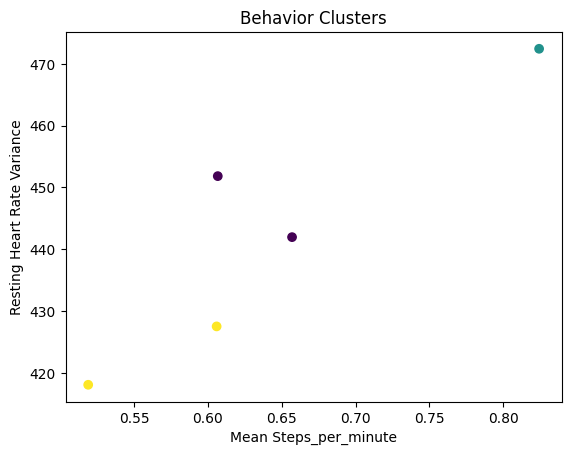

In [40]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(
    tsfresh_features["Steps_per_minute__mean"],
    tsfresh_features["heart_rate__variance"],
    c=tsfresh_features["cluster"]
)
plt.xlabel("Mean Steps_per_minute")
plt.ylabel("Resting Heart Rate Variance")
plt.title("Behavior Clusters")
plt.show()